<a href="https://colab.research.google.com/github/Neo-glitch/computer-vision-masterclass/blob/main/Neural_Networks_for_Image_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* N.B: This isn't optimal since normally working with ImageData requires CNN and not just NN

* Aim is to classify uf image is Homer or Bart

### Approach 1: Using all image pixels without feature extraction and using it to train the NN

In [1]:
 # mount gDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Extracting Features

In [3]:
# extract file
path = "/content/drive/MyDrive/Computer Vision Masterclass Files/Datasets/homer_bart_1.zip"

zip_object = zipfile.ZipFile(path, "r")
zip_object.extractall('./')   # extract this file in current dir
zip_object.close()

In [4]:
directory = "/content/homer_bart_1"
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]  # gets full name of files

# print(files)

In [5]:
height, width = 128, 128

In [6]:
images = []  # stores flatten image to be used as input
classes = [] # to store classes

In [7]:
for image_path in files:

  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]

  except:
    print("Not an image File")
    continue


  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = image.ravel()  # returns flatten view of original array, could have used .flatten

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))  # gets the image file name and extension attached
  if image_name.startswith("b"):
    class_name = 0  # BART
  else:
    class_name = 1  # HOMER

  classes.append(class_name)




Not an image File


In [8]:
type(images), type(classes)

(list, list)

In [9]:
# transform list to np arrays
x = np.asarray(images)
y = np.asarray(classes)

type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
x.shape, y.shape

((269, 16384), (269,))

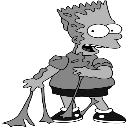

In [11]:
cv2_imshow(x[0].reshape(width, height))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), array([160, 109]))

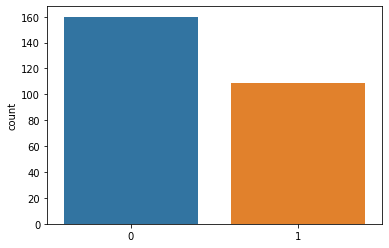

In [12]:
# to get info about occurence of classes
sns.countplot(y);

# number of class instances
np.unique(y, return_counts=True)

In [13]:
# Normalizing

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)   # could have just done x/255.0

x.max(), x.min()

(1.0000000000000002, 0.0)

#### Training and Test set

In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((215, 16384), (215,), (54, 16384), (54,))

#### Building Model and Evaluation

In [64]:
# using rule of thumb for neurons in hidden layer i.e input neurons + output neurons / 2 = number of neurons in hidden layer
# (16384 + 2) / 2 = 8193 neurons

model = keras.models.Sequential([
              keras.layers.Dense(input_shape = (16384,), units = 8193, activation ="relu"),
              keras.layers.Dense(units = 4097, activation ="relu"),
              keras.layers.Dense(units = 8193, activation ="relu"),
              keras.layers.Dense(units = 1, activation ="sigmoid")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_8 (Dense)             (None, 4097)              33570818  
                                                                 
 dense_9 (Dense)             (None, 8193)              33574914  
                                                                 
 dense_10 (Dense)            (None, 1)                 8194      
                                                                 
Total params: 201,396,231
Trainable params: 201,396,231
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [66]:
history = model.fit(x_train, y_train, epochs = 55, validation_data = (x_test, y_test))

Epoch 1/55
7/7 [==============================] - 1s 90ms/step - loss: 173.6515 - accuracy: 0.4558 - val_loss: 2.9521 - val_accuracy: 0.4815
Epoch 2/55
7/7 [==============================] - 0s 58ms/step - loss: 4.4964 - accuracy: 0.5209 - val_loss: 8.8457 - val_accuracy: 0.5185
Epoch 3/55
7/7 [==============================] - 0s 56ms/step - loss: 3.4962 - accuracy: 0.5395 - val_loss: 2.3853 - val_accuracy: 0.5185
Epoch 4/55
7/7 [==============================] - 0s 53ms/step - loss: 1.0620 - accuracy: 0.5395 - val_loss: 0.7406 - val_accuracy: 0.5185
Epoch 5/55
7/7 [==============================] - 0s 53ms/step - loss: 0.7745 - accuracy: 0.5442 - val_loss: 0.7522 - val_accuracy: 0.4815
Epoch 6/55
7/7 [==============================] - 0s 55ms/step - loss: 0.7351 - accuracy: 0.5581 - val_loss: 0.7026 - val_accuracy: 0.5185
Epoch 7/55
7/7 [==============================] - 0s 55ms/step - loss: 0.6985 - accuracy: 0.4744 - val_loss: 0.7813 - val_accuracy: 0.5185
Epoch 8/55
7/7 [=========

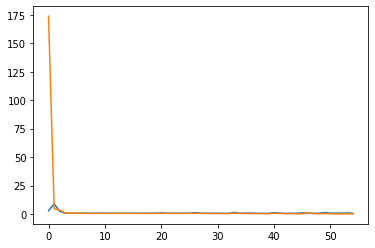

In [67]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])


In [72]:
# predictions

predictions = model.predict(x_test)

predictions.shape

(54, 1)

In [73]:
# threshold = 0.5 
# 0 - False i.e Bart
# 1 - True i.e Homer

predictions = [predictions > 0.5]

y_test.shape

(54,)

In [74]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

y_pred = np.array(predictions).flatten()

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")



accuracy: 0.8148148148148148
f1_score: 0.8
recall_score: 0.7692307692307693
precision_score: 0.8333333333333334


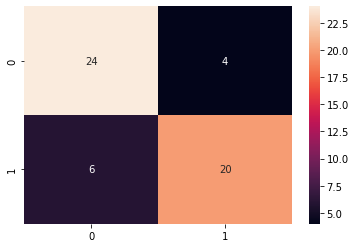

In [75]:
from sklearn.metrics import confusion_matrix

# row is actual, while column is predicted.
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True)

#### Saving and Loading Model

In [76]:
model_json = model.to_json()

# save just model structure alone
with open("model1.json", "w") as json_file:
  json_file.write(model_json)

# save model weights
from keras.models import save_model

model_saved = save_model(model, "weights.hdf5")



# n.b: This doesn't save the model optimizer(best to save the model structure and weights in one go on keras to get these)

In [77]:
# Load model structure and weights


with open("model1.json", "r") as json_file:
  json_saved_model = json_file.read()

model1_loaded = keras.models.model_from_json(json_saved_model)   # load the structure
model1_loaded.load_weights("/content/weights.hdf5")

# optimizer must be same as saved model
model1_loaded.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

model1_loaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_8 (Dense)             (None, 4097)              33570818  
                                                                 
 dense_9 (Dense)             (None, 8193)              33574914  
                                                                 
 dense_10 (Dense)            (None, 1)                 8194      
                                                                 
Total params: 201,396,231
Trainable params: 201,396,231
Non-trainable params: 0
_________________________________________________________________


### Classify a single image

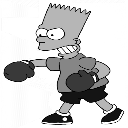

In [82]:
# get test image first in format before flattening and pixel normalization
# for displaying
test_image = x_test[44]
test_image = scaler.inverse_transform(test_image.reshape(1, -1))

cv2_imshow(test_image.reshape(128, 128))

In [83]:
# classfification
if (model1_loaded.predict(x_test[44].reshape(1,-1))[0][0] < 0.5):
  print("Predictions: Bart with class 0")
else:
  print("Predictions: Homer with class 1")

Predictions: Bart with class 0


### Approach 2: Using Extracted Features(Using OpenCV) to train NN

* N.B: When using CNN this feature extraction isn't that important, since CNN handles extracting features